## Cell 1: Salary Prediction Project Introduction

In [5]:
# Salary Prediction Project: EDA and Model Building

'''This notebook covers exploratory data analysis, feature engineering, model training, and evaluation for predicting employee salary (CTC) based on profile and experience.'''


'This notebook covers exploratory data analysis, feature engineering, model training, and evaluation for predicting employee salary (CTC) based on profile and experience.'

## Cell 2: Import Required Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import os

## Cell 3: Load Dataset

In [9]:
# Load data
import os
BASE_DIR = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(BASE_DIR, 'data', 'expected_ctc.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390


## Cell 4: Data Overview and Missing Value Check

In [10]:
# Data overview
print('Data Shape:', df.shape)
print('\nData Sample:')
print(df.head())
print('\nMissing Values:')
print(df.isnull().sum())

Data Shape: (25000, 29)

Data Sample:
   IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education

## Cell 5: Visualize Expected CTC distribution

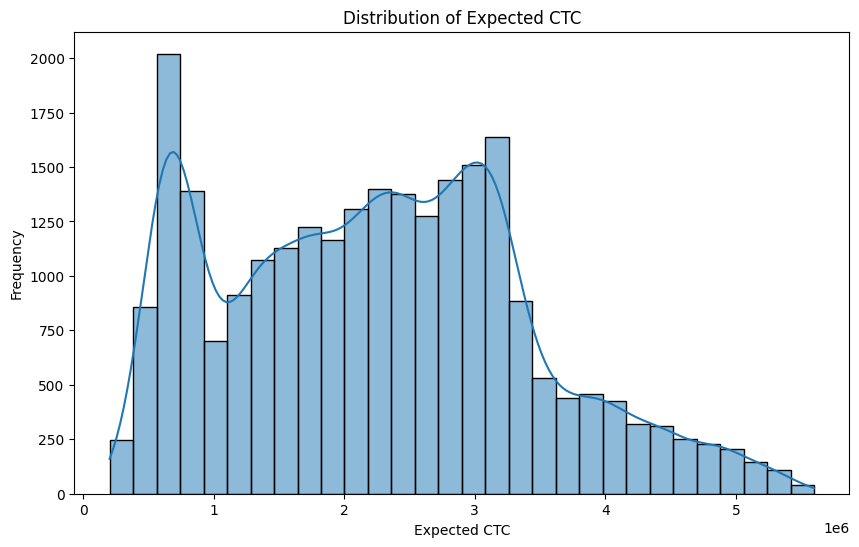

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Expected_CTC'], bins=30, kde=True)
plt.title('Distribution of Expected CTC')
plt.xlabel('Expected CTC')
plt.ylabel('Frequency')
plt.show()

## Cell 6: Correlation Heatmap for Numerical Features

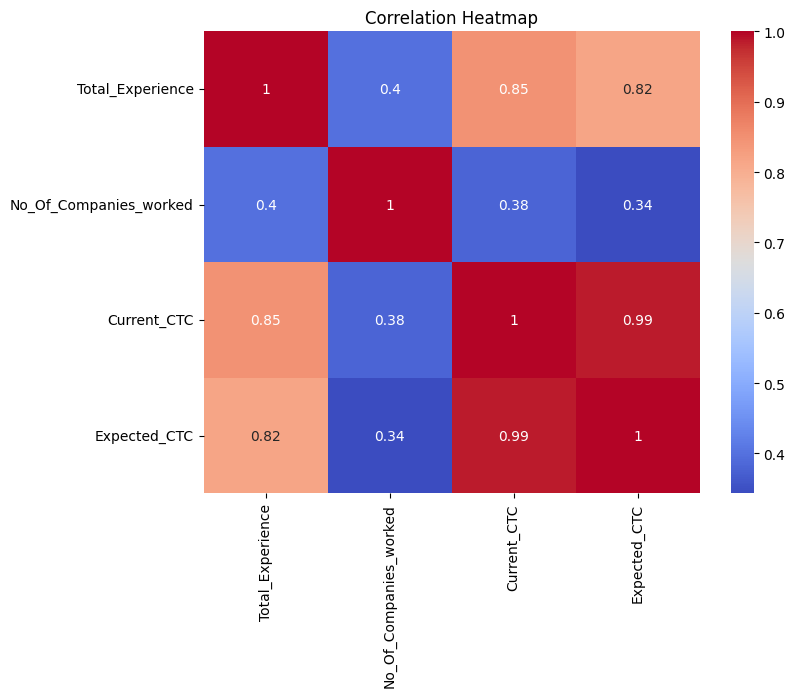

In [12]:
num_features = ['Total_Experience', 'No_Of_Companies_worked', 'Current_CTC', 'Expected_CTC']
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Cell 7: Feature Selection and Train-Test Split

In [13]:
# Feature selection and train-test split
features = [
    'Industry',
    'Department',
    'Role',
    'Education',
    'Total_Experience',
    'No_Of_Companies_worked',
    'Current_CTC'
]
target = 'Expected_CTC'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cell 8: Preprocessing and Pipeline Setup

In [14]:
categorical_features = ['Industry', 'Department', 'Role', 'Education']
numerical_features = ['Total_Experience', 'No_Of_Companies_worked', 'Current_CTC']

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

## Cell 10: Model Training and Evaluation

In [15]:
# Model training and evaluation
model.fit(X_train, y_train)
print("Model training complete.")
score = model.score(X_test, y_test)
print(f"Test R^2 Score: {score:.4f}")

Model training complete.
Test R^2 Score: 0.9874


## Summary and Next Steps

- Explored and visualized the salary dataset
- Built and evaluated a regression model for salary prediction
- Next: Tune model, try other algorithms, or deploy for HR use